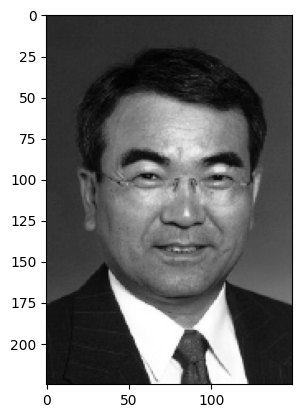

In [1]:
from dense_image_aligment.transformations.affine import AffineTransformation
import numpy as np
from dense_image_aligment import read_as_grayscale
import matplotlib.pyplot as plt 


image = read_as_grayscale('./media/kanade.jpg')
plt.imshow(image, cmap='Greys_r')
plt.show()

In [9]:
image.shape

(225, 150)

In [2]:
at = AffineTransformation()

In [3]:
at.p[0] = 1.5
at.p[2] = 0.
at.p

array([1.5, 0. , 0. , 0. , 1. , 0. ], dtype=float32)

In [4]:
image_transformed = at.apply_transformation(image=image, shape=image.shape)

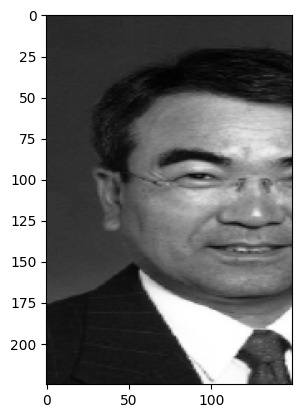

In [5]:
plt.imshow(image_transformed, cmap='Greys_r')
plt.show()

In [1]:
from dense_image_aligment import show_data, image_aligment_method, read_as_grayscale
from dense_image_aligment import save_aligment_progress, read_as_colored, show_data
import numpy as np
from dense_image_aligment.transformations.affine import AffineTransformation

In [2]:
# image = read_as_grayscale('./media/kanade_image.jpg')
# templ = read_as_grayscale('./media/kanade.jpg')

image = read_as_grayscale('./media/kanade.jpg')
templ = read_as_grayscale('./media/kanade_image.jpg')

image.shape, templ.shape

((225, 150), (70, 50))

In [3]:
method, params = image_aligment_method(key='forward_additive')
params['alpha'] = .5
params['max_iterations'] = 100
params['p_init'] = np.array([[  1.02040816,  -0.10204082, -33.67346939],
       [ -0.20408163,   1.02040816, -63.26530612]]).reshape(-1)

affine_transform = AffineTransformation(params['p_init'].reshape(-1))

In [4]:
# import cv2 
# cv2.invertAffineTransform(np.array(
#     [
#         [1, 0.1, 40], 
#         [0.2, 1., 70.],
#     ]
# ))

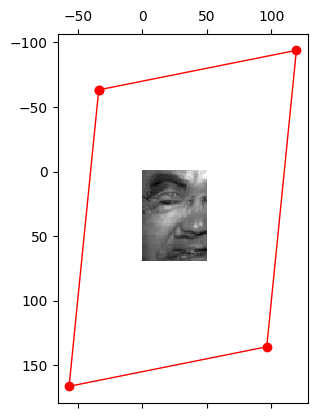

In [5]:
show_data(
    image=image, 
    template=templ, 
    coords_transform=affine_transform
)

In [6]:
params

{'max_iterations': 100,
 'convergence_threshold': 0.0001,
 'verbose': True,
 'alpha': 0.5,
 'p_init': array([  1.02040816,  -0.10204082, -33.67346939,  -0.20408163,
          1.02040816, -63.26530612])}

In [7]:
ps = method(
    image=image,
    template=templ,
    coord_transform=affine_transform,
    **params
)

iteration: 99, |∇p|=0.44901: 100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


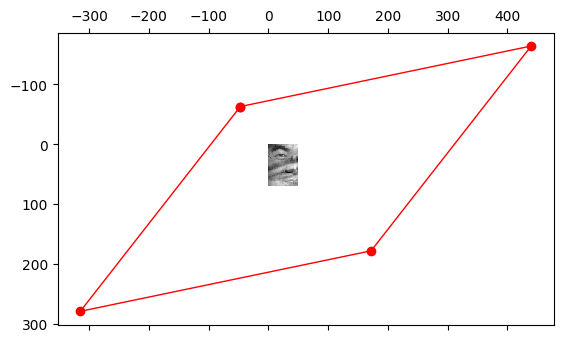

In [8]:
affine_transform.p = ps[-1]

show_data(
    image=image, 
    template=templ, 
    coords_transform=affine_transform
)

100%|██████████| 101/101 [00:28<00:00,  3.54it/s]


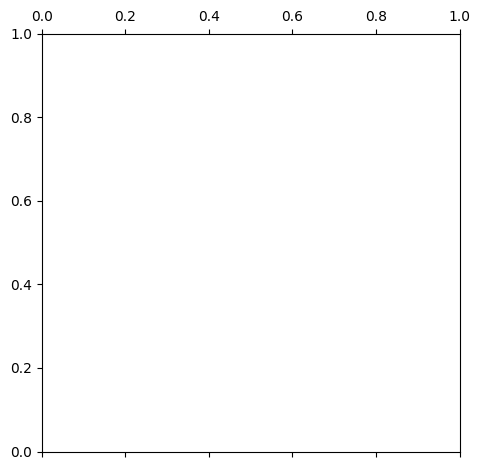

In [14]:
save_aligment_progress(
    f'./draft.gif',
    image=image,
    template=templ,
    coords_transform=affine_transform,
    ps=ps,
    duration=100,
)

In [10]:
# 1. Попробовать очень простое преобразование (трансляцию например)
# 2. Попробовать мб что-то сложнее типа вращения или скалирования 